## Observations and Insights 

In [2]:
#%matplotlib inline
#%matplotlib notebook
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data=pd.merge(mouse_metadata,study_results, on= "Mouse ID")
# Display the data table for preview
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
total_mice =len(combined_data["Mouse ID"].unique())
total_mice

249

In [4]:
combined_data.sort_values(by=['Mouse ID']).head(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
460,a203,Infubinol,Female,20,23,30,59.523197,1
461,a203,Infubinol,Female,20,23,35,61.931650,2
459,a203,Infubinol,Female,20,23,25,56.793208,1
458,a203,Infubinol,Female,20,23,20,55.173336,1
457,a203,Infubinol,Female,20,23,15,52.777870,1
456,a203,Infubinol,Female,20,23,10,51.852437,1
462,a203,Infubinol,Female,20,23,40,63.593490,2
463,a203,Infubinol,Female,20,23,45,67.973419,2
455,a203,Infubinol,Female,20,23,5,48.508468,0
454,a203,Infubinol,Female,20,23,0,45.000000,0


In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse = combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mouse

array(['g989'], dtype=object)

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_df = combined_data.loc[combined_data['Mouse ID'] == 'g989']
duplicate_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data=combined_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep="last")
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Checking the number of mice in the clean DataFrame.
single_mice =len(clean_data["Mouse ID"].unique())
single_mice

249

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
        #and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.

summary_statistics = clean_data.groupby('Drug Regimen').agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
summary_statistics


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.382993  50.783528  43.220205  6.574208  0.526358
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and 
        #SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function
regimen_mean = clean_data.groupby("Drug Regimen").mean()['Tumor Volume (mm3)'] 
regimen_median= clean_data.groupby("Drug Regimen").median() ['Tumor Volume (mm3)'] 
regimen_variance =clean_data.groupby("Drug Regimen").var() ['Tumor Volume (mm3)'] 
regimen_std= clean_data.groupby("Drug Regimen").std()['Tumor Volume (mm3)'] 
regimen_sem =clean_data.groupby("Drug Regimen").sem()['Tumor Volume (mm3)'] 

summary_statistics2= pd.DataFrame ({"Mean":regimen_mean, "Median":regimen_median,"Variance":regimen_variance, 
                                   "Standard Deviation":regimen_std, "SEM": regimen_sem
                                  })
summary_statistics2

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.382993,50.783528,43.220205,6.574208,0.526358
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

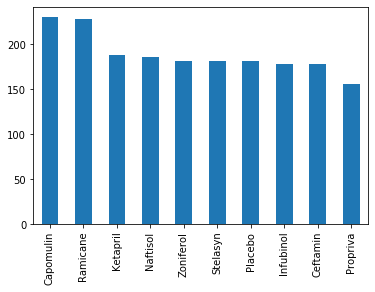

In [11]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
total_mice_plot = clean_data["Drug Regimen"].value_counts()
total_mice_plot.plot(kind = "bar")
plt.show()


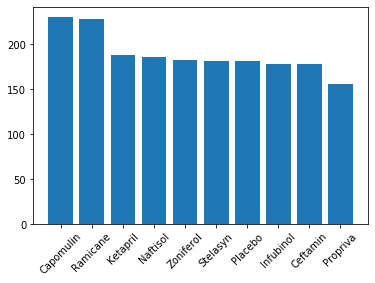

In [12]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
total_mice_plot = clean_data["Drug Regimen"].value_counts()
#total_mice_plot= clean_data.plot.bar(x='Drug Regimen', y='')
x_values = total_mice_plot.index.values
y_values = total_mice_plot.values
y_values
plt.bar(x_values, y_values)
plt.xticks(rotation =45)
plt.show()

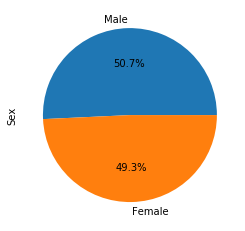

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
total_mice_pie = clean_data["Sex"].value_counts()

total_mice_pie.plot(kind = "pie", autopct = "%1.1f%%")
plt.show()

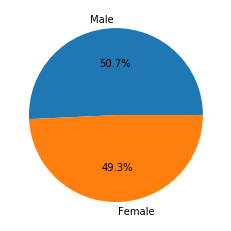

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pie_labels = total_mice_pie.index.values
pie_y_values = total_mice_pie.values
plt.pie(pie_y_values, labels = pie_labels, autopct = "%1.1f%%")
plt.show()


## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
final_tumor = clean_data.groupby(["Drug Regimen","Mouse ID"])['Tumor Volume (mm3)'].max()
final_tumor
#Start by getting the last (greatest) timepoint for each mouse
greatest_tumor = clean_data.groupby(["Mouse ID"])['Timepoint'].max()
greatest_tumor = greatest_tumor.reset_index()
greatest_tumor
# # Merge this group df with the original dataframe to get the tumor volume at the last timepoint
clean_merge_data = greatest_tumor.merge(clean_data, on=['Mouse ID', 'Timepoint'], how ='left')
clean_merge_data


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [29]:
# # Put treatments into a list for for loop (and later for plot labels)
treatment_list= ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list= []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = final_tumor.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
quartiles   
print(f"The lower quartile of t is: {lowerq}")
print(f"The upper quartile of t  is: {upperq}")
print(f"The interquartile range of t  is: {iqr}")
print(f"The the median of t s is: {quartiles[0.5]} ")

# Locate the rows which contain mice on each drug and get the tumor volumes
locate_data = clean_data.groupby(["Drug Regimen","Mouse ID"])['Tumor Volume (mm3)'].max()
locate_data
    
    # add subset 
# subsets=locate_data[locate_data["Drug Regimen"] == "Capomulin"]
# subsets
    
    # Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of t is: 46.91089166
The upper quartile of t  is: 64.95756185
The interquartile range of t  is: 18.046670190000007
The the median of t s is: 55.84141007 
Values below 19.840886374999986 could be outliers.
Values above 92.02756713500001 could be outliers.


In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
timepoint=
tumor_volume=


In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
mouse_weight=
average_tumor_vol=

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
